# Angler tests

In [1]:
import numpy as np
import matplotlib.pyplot as plt

from angler import Simulation
from datasets.generators1d import * 
np.set_printoptions(precision=3)

In [2]:
DEVICE_LENGTH = 65
CAVITY_BUFFER = 16
BUFFER_PERMITTIVITY = -1e10
NPML = 0
DL = 0.05
L0 = 1e-6
MODE = "Ez"

In [3]:
OMEGA = 1.215e15
MU0 = 4 * np.pi * 10**-7
EPSILON0 =  8.854187817620e-12 
SCALE = 1e-15
C = 299792458.0
L0 = 1e-6
PIXEL_SIZE = 0.05 * L0
wavelength = 2 * np.pi * C / OMEGA

In [4]:
epsilons = perm_alternating_layers(s=DEVICE_LENGTH)

In [5]:
total_length = DEVICE_LENGTH + 2 * CAVITY_BUFFER + 2 * NPML
start = NPML + CAVITY_BUFFER
end = start + DEVICE_LENGTH

# need to use two rows to avoid issues with fd-derivative operators
# perms = np.ones((2, total_length), dtype=np.float64)
perms = np.ones((1, total_length), dtype=np.float64)


# set permittivity and reflection zone
perms[:, :start] = BUFFER_PERMITTIVITY
perms[:, start:end] = epsilons
perms[:, end:] = BUFFER_PERMITTIVITY

# perms[:start] = BUFFER_PERMITTIVITY
# perms[start:end] = np.reshape(epsilons, (end-start, 1))
# perms[end:] = BUFFER_PERMITTIVITY

src_x = int(DEVICE_LENGTH / 2)

sim = Simulation(OMEGA, perms, DL, [0, NPML], MODE, L0=L0)

sim.src[:, src_x + NPML + CAVITY_BUFFER] = 1j
# sim.src[src_x + NPML + CAVITY_BUFFER, :] = 1j


clip0 = None# NPML + CAVITY_BUFFER
clip1 = None#-(NPML + CAVITY_BUFFER)

Hx, Hy, Ez = sim.solve_fields()
perms = perms[:, clip0:clip1]
Hx = Hx[:, clip0:clip1]
Hy = Hy[:, clip0:clip1]
Ez = Ez[:, clip0:clip1]
# return perms[0], src_x, Hx[0], Hy[0], Ez[0]

In [7]:
A = sim.A.todense()
# A = np.real(A)
# N = A.shape[0]//2
# A1 = A[:N,:N]
# A2 = A[N:,:N]
# A3 = A[:N,N:]
# A4 = A[:N,:N]
# print(A1)
# print(A2)
# print(A3)
# print(A4)

/Users/ben/anaconda3/lib/python3.6/site-packages/numpy/core/numeric.py:492: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


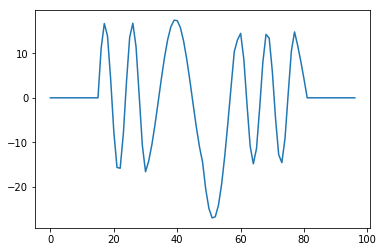

In [8]:
plt.plot(Ez[0])
plt.show()

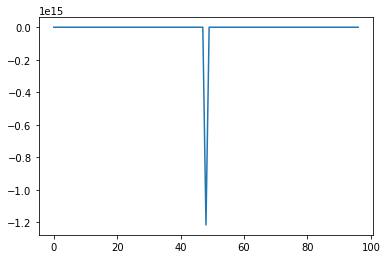

In [10]:
curl=np.real(np.asarray(A @ Ez.flatten()))[0]
plt.plot(curl)
plt.show()